# TSM_AppElm Labo02 
## conception d'une antenne patch

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fres = 1.575

In [51]:
class findParam:
    def __init__(self, data,fres):
        self.data = data
        self.fres = fres

    def findMin(self,data):
        val = np.min(data[:,1])
        index = np.where(val == data[:,1])
        return np.squeeze(data[index])

    def findBP(self,data):
        tab = np.where(data[:,1] < -10)
        if len(tab[0]) > 0:
            BPmin = data[tab[0][0]][0]
            BPmax = data[tab[0][len(tab[0])-1]][0]
            return BPmin, BPmax
        return 0, 0 

    def findFreq(self,data,f,offset=0.001):
        tab = np.where((data[:,0] < f+offset) & (data[:,0] > f-offset))
        tab2 = data[tab[0]]
        return np.mean(tab2[:,1])

    def __repr__(self):
        vmin = self.findMin(self.data)
        fmin, fmax = self.findBP(self.data)
        s11F = self.findFreq(self.data,self.fres)
        return "s11 min\t: " + str(vmin) + "\nBP\t: " + str(fmin)+','+str(fmax)+"\n@fr\t: "+str(s11F)

    

In [52]:
#dataFR4 = pd.read_csv('result_navigator.csv',sep=';')
#dataFR4


s11 min	: [  1.57500005 -27.7825864 ]
BP	: 1.5700000524521,1.5800000429153
@fr	: -27.782586398633

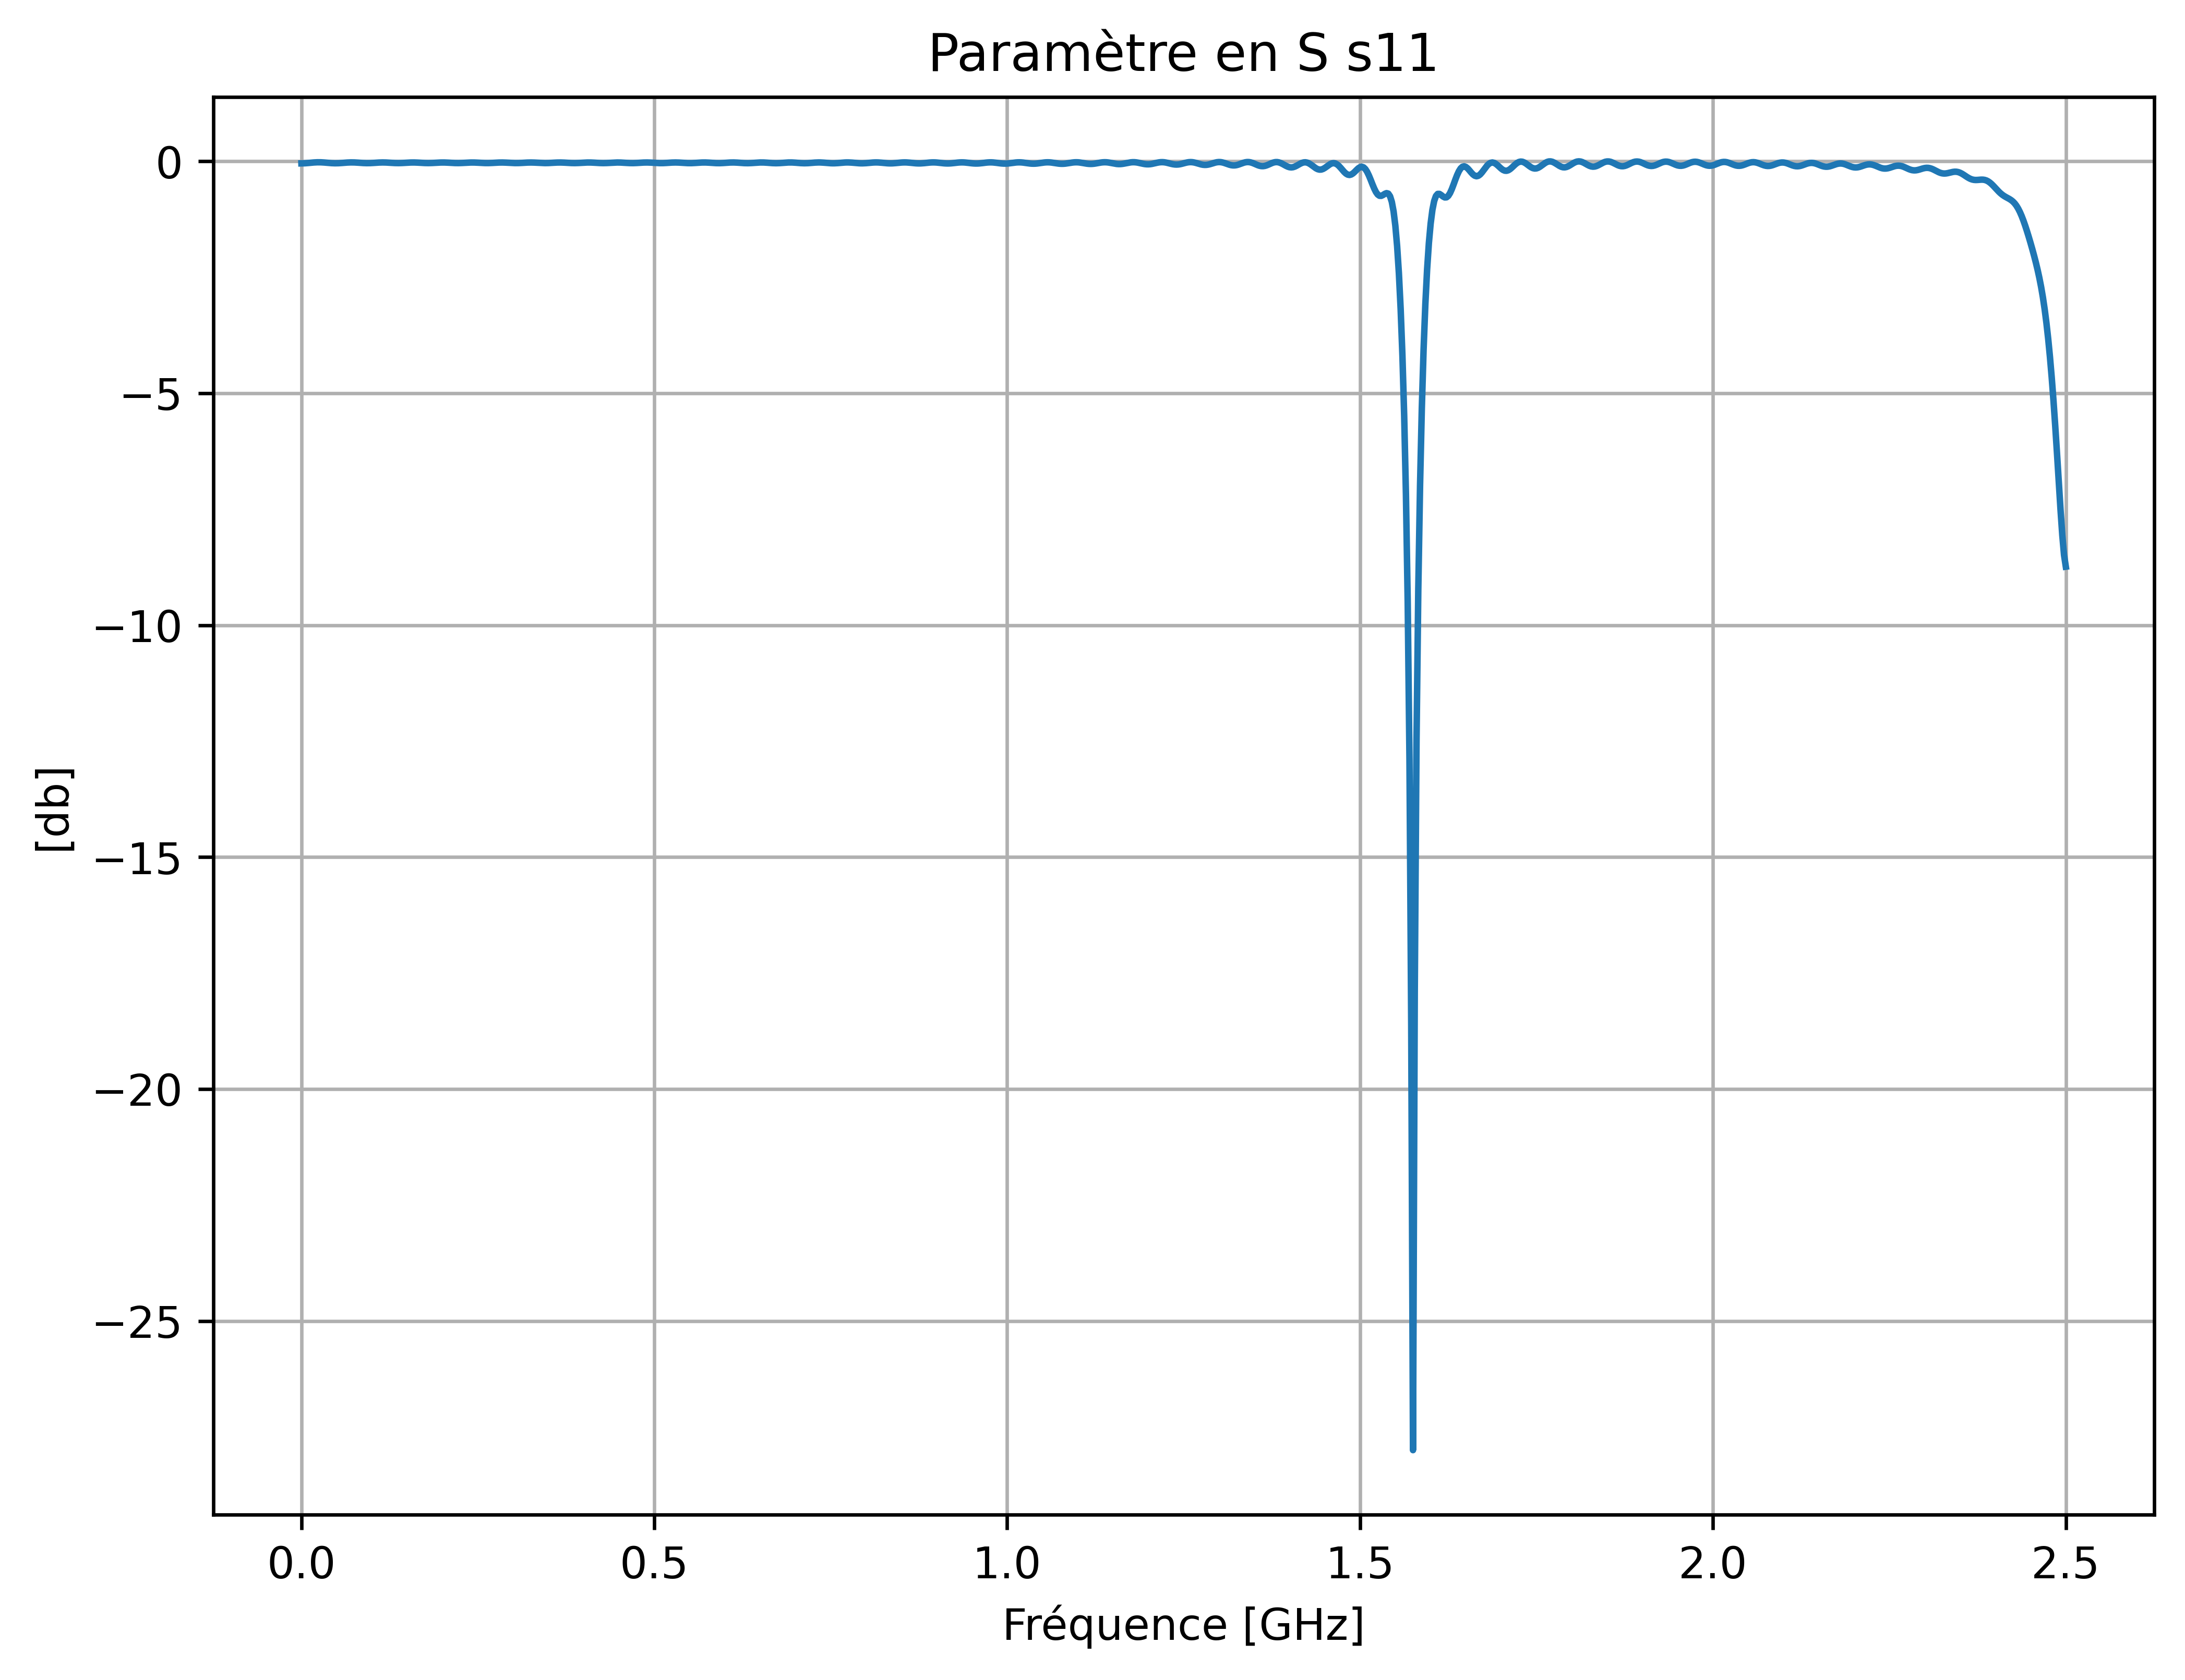

In [53]:
S11_fr4 = np.genfromtxt('antennePatchFR4_OK.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=600)
plt.plot(S11_fr4[:,0], S11_fr4[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findParam(S11_fr4, fres)

## Partie 2 avec de la ceramique

In [54]:
#dataCER = pd.read_csv('result_navigator_cer_ok.csv',sep=';')
#dataCER

In [55]:
S11_cer = np.genfromtxt('antenne_CER_mode1.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(S11_cer[:,0], S11_cer[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findParam(S11_cer,fres)

OSError: antenne_CER_mode1.txt not found.

## Modification de l'antenne FR4 de 10%

In [ ]:
legend = ["original","ws","ls","w","l","w0","w1","y0","y1"]

In [ ]:
S11_m_fr4 = np.zeros((1001,2,6))

plt.figure(figsize=(15, 6), dpi=600)
for k in range(0,6):
    filename = 'variationsFR4/modificationsFR4_'+ str(k) +'.txt'
    S11_m_fr4[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
    plt.plot(S11_m_fr4[700:850,0,k], S11_m_fr4[700:850,1,k],label=legend[k])
    print('\n'+legend[k])
    print(findParam(S11_m_fr4[:,:,k],fres))
plt.axvline(x = fres, color = 'b', label = '$f_{res}$',linewidth=1) 
plt.axhline(y = -10, color = 'r', label = '$BP$',linewidth=1) 
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation variation s11 / patch FR4")
plt.legend()
#plt.savefig("../Figures/patch/patch_var_fr4.png")
plt.show()


OSError: variationsFR4/modificationsFR4_0.txt not found.

<Figure size 1200x480 with 0 Axes>


original
s11 min	: [  1.57599998 -21.1932605 ]
BP	: 1.5700000524521,1.5800000429153
@fr	: -20.9719182384775

ws
s11 min	: [  1.574      -29.52813324]
BP	: 1.567999958992,1.5800000429153
@fr	: -25.5479963012215

ls
s11 min	: [  1.574      -26.45711618]
BP	: 1.567999958992,1.5800000429153
@fr	: -24.545642526444

w
s11 min	: [  1.56400001 -12.342322  ]
BP	: 1.5620000362396,1.567999958992
@fr	: -6.1484957456218

l
s11 min	: [  1.44599998 -10.66283636]
BP	: 1.444000005722,1.4479999542236
@fr	: 0.0805078131203735

w0
s11 min	: [  1.57599998 -19.51595923]
BP	: 1.5700000524521,1.5820000171661
@fr	: -18.630787683459

w1
s11 min	: [  1.57599998 -16.69913231]
BP	: 1.5700000524521,1.5800000429153
@fr	: -16.277054345735

y0
s11 min	: [ 1.57000005 -9.97230245]
BP	: 0,0
@fr	: -7.963768138870201

y1
s11 min	: [  1.574      -16.12945499]
BP	: 1.5700000524521,1.5800000429153
@fr	: -15.8539196299875


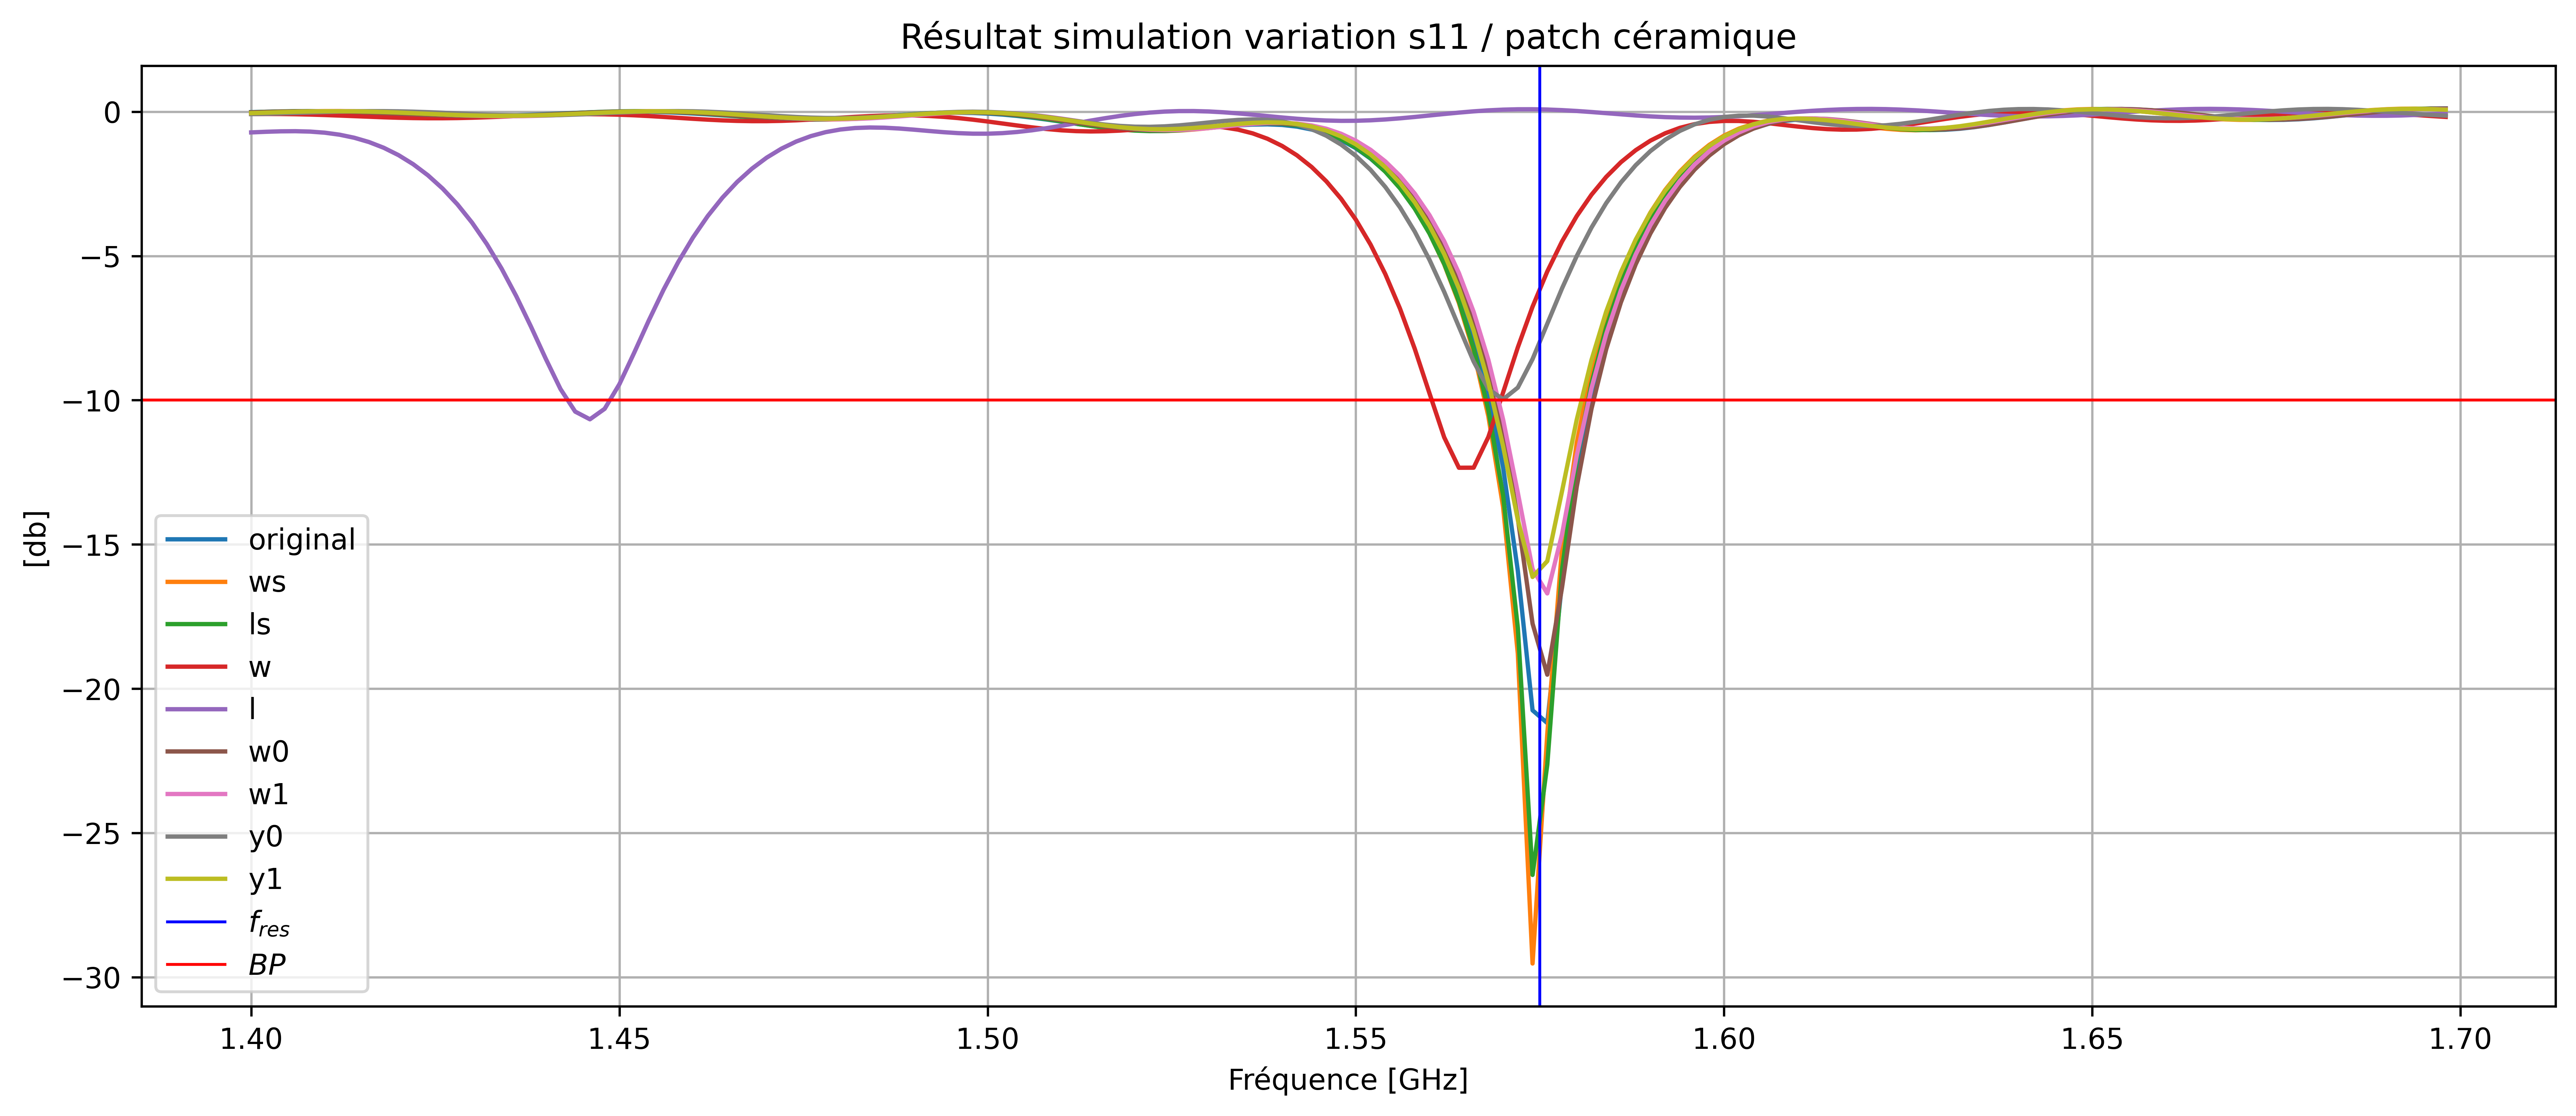

In [ ]:
nbVal = 9
S11_m_cer = np.zeros((1001,2,nbVal))

plt.figure(figsize=(15, 6), dpi=600)
for k in range(0,nbVal):
    filename = 'variationsCER/modificationsCER_'+ str(k) +'.txt'
    S11_m_cer[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
    plt.plot(S11_m_cer[700:850,0,k], S11_m_cer[700:850,1,k],label=legend[k])
    print('\n'+legend[k])
    print(findParam(S11_m_cer[:,:,k],fres))
plt.axvline(x = fres, color = 'b', label = '$f_{res}$',linewidth=1) 
plt.axhline(y = -10, color = 'r', label = '$BP$',linewidth=1) 
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation variation s11 / patch céramique")
plt.legend()
plt.savefig("../Figures/patch/patch_var_cer.png")
plt.show()